In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


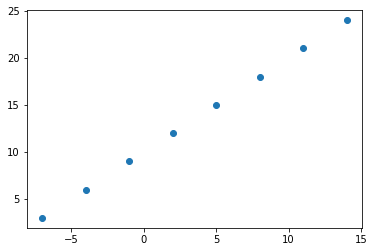

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.fit(tf.expand_dims(X,axis=1),y,epochs= 5)



Epoch 1/5
1/1 [==============================] - 0s 479ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation = 'relu'))
model.add(tf.keras.layers.Dense(100,activation = 'relu'))
# model.add(tf.keras.layers.Dense(100,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])
model.fit(tf.expand_dims(X,axis=1),y , epochs=100)

In [ ]:
model.predict([17.0])

array([[26.77314]], dtype=float32)

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

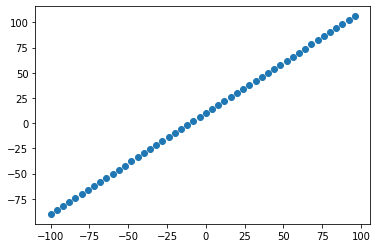

In [ ]:
plt.scatter(X,y)

In [ ]:
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

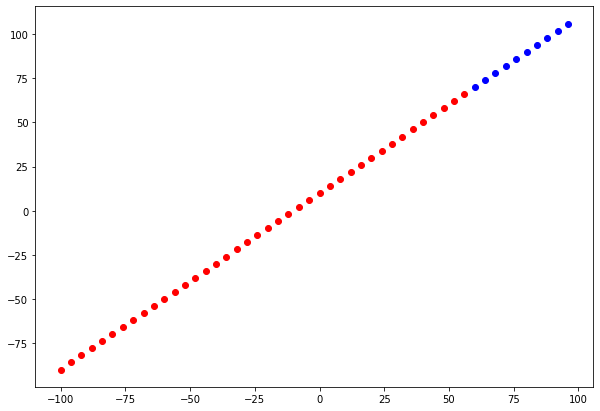

In [ ]:
plt.figure(figsize= (10,7))
plt.scatter(X_train,y_train,c='r',label="Training data")
plt.scatter(X_test,y_test,c='b',label="Testing data")

In [ ]:
tf.random.set_seed(42)
model =tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(1,name="output_layer"))

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr= 0.01),
              metrics = ["mae"])
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100,verbose=1)


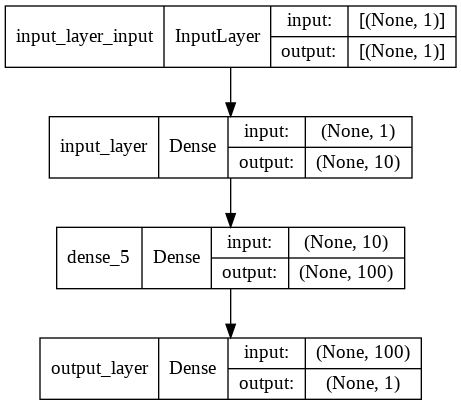

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred.flatten(),y_test

(array([ 69.11415 ,  73.064125,  77.01572 ,  80.9679  ,  84.91987 ,
         88.87148 ,  92.82311 ,  96.77478 , 100.72646 , 104.67814 ],
       dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
def plotpred(train_data = X_train,
             train_labels = y_train,
             test_data = X_test,
             test_labels = y_test,
             predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',label="Training data")
  plt.scatter(test_data,test_labels, c='g',label="Testing data")
  plt.scatter(test_data,predictions,c='r',label="Predictions")
  plt.legend()


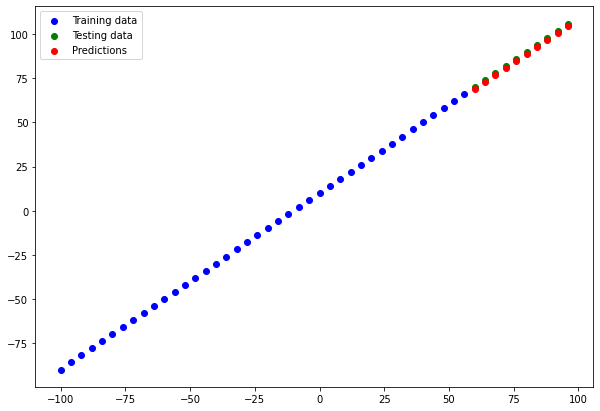

In [ ]:
plotpred()

In [ ]:
#evaluation metrics

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 138ms/step - loss: 1.1044 - mae: 1.1044


[1.1044273376464844, 1.1044273376464844]

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.11415 ,  73.064125,  77.01572 ,  80.9679  ,  84.91987 ,
        88.87148 ,  92.82311 ,  96.77478 , 100.72646 , 104.67814 ],
      dtype=float32)>

In [ ]:
calmae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
calmae

<tf.Tensor: shape=(), dtype=float32, numpy=1.1044258>

In [ ]:
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.2390305>

In [ ]:
def calmae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))
def calmse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

In [ ]:
#saving our models

model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/my_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#using a bigger dataset from kaggle
#medical insurqnce charges regression

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#turn categorical data to numerical data using one hot encoding
#pandas.get_dummies

insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X= insurance_onehot.drop("charges",axis=1)
y = insurance_onehot["charges"]

In [ ]:
X.shape

(1338, 11)

In [ ]:
#use scikit learn test treain split 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# X_train.shape,y_train.shape

In [ ]:
#build a NN
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(512,activation = 'relu'))
insurance_model.add(tf.keras.layers.Dense(512, activation = 'relu'))
insurance_model.add(tf.keras.layers.Dense(256,activation='relu'))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr=0.01),
                        metrics = ["mae"])
history = insurance_model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=200)

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1477.6748 - mae: 1477.6748


[1477.6748046875, 1477.6748046875]

Text(0.5, 0, 'epochs')

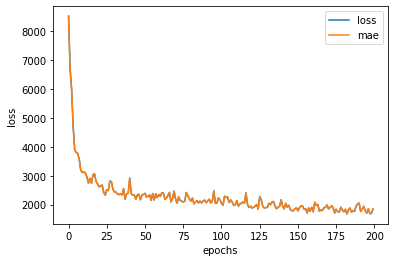

In [ ]:
#plot history (loss or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#using normalization (scaling between 0,1) and standardization
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#build a NN
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(512,activation = 'relu'))
insurance_model.add(tf.keras.layers.Dense(512, activation = 'relu'))
insurance_model.add(tf.keras.layers.Dense(256,activation='relu'))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr=0.01),
                        metrics = ["mae"])
history = insurance_model.fit(tf.expand_dims(X_train_normal,axis=1),y_train,epochs=200)



In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1561.9515 - mae: 1561.9515


[1561.9515380859375, 1561.9515380859375]

Text(0.5, 0, 'epochs')

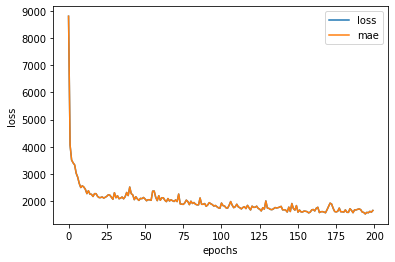

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")